In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/python_for_data_science/master/Data/customer_behavior.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
bachelor     12 non-null int64
gender       12 non-null int64
age          12 non-null int64
salary       12 non-null int64
purchased    12 non-null int64
dtypes: int64(5)
memory usage: 560.0 bytes


In [3]:
X = df[['bachelor','gender', 'age', 'salary']]

In [4]:
X

,bachelor,gender,age,salary
0,1,0,23,1500
1,1,0,30,2500
2,1,0,32,1800
3,1,0,25,1700
4,1,0,27,1200
5,1,1,26,1000
6,1,1,35,3500
7,1,0,23,2000
8,1,0,22,1800
9,1,0,21,1700


In [6]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold()


In [7]:
sel

VarianceThreshold(threshold=0.0)

In [11]:
X.var()

bachelor    0.000000e+00
gender      2.424242e-01
age         3.324242e+01
salary      1.292955e+06
dtype: float64

In [8]:
X_val = sel.fit_transform(X)


In [9]:
sel

VarianceThreshold(threshold=0.0)

In [10]:
X_val

array([[   0,   23, 1500],
       [   0,   30, 2500],
       [   0,   32, 1800],
       [   0,   25, 1700],
       [   0,   27, 1200],
       [   1,   26, 1000],
       [   1,   35, 3500],
       [   0,   23, 2000],
       [   0,   22, 1800],
       [   0,   21, 1700],
       [   1,   38, 5000],
       [   1,   20, 1200]])

In [18]:
#df.columns
#sel.get_support()
df.loc[:,sel.get_support()]

,gender,age,salary
0,0,23,1500
1,0,30,2500
2,0,32,1800
3,0,25,1700
4,0,27,1200
5,1,26,1000
6,1,35,3500
7,0,23,2000
8,0,22,1800
9,0,21,1700


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
X = df[['bachelor','gender', 'age', 'salary']]


In [21]:
y = df['purchased'].values


In [22]:
clf = SelectKBest(chi2, k=2)
clf.fit(X,y)


SelectKBest(k=2, score_func=<function chi2 at 0x1258d2840>)

In [23]:
clf.scores_

array([   0.        ,    0.        ,    4.48447205, 2766.66666667])

In [25]:
X_new = clf.fit_transform(X,y)
print(X_new[0:3,:])


[[  23 1500]
 [  30 2500]
 [  32 1800]]


In [31]:
a = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
from itertools import combinations
ary = []
for i in range(1,6):
    ary += combinations(a,i)

In [32]:
len(ary)

119

In [33]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')

rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_val,y)


RFE(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=1, step=1, verbose=0)

In [34]:
rfe.ranking_

array([3, 2, 1])

In [35]:
rfe.support_

array([False, False,  True])

In [39]:
names = ['gender', 'age', 'salary']

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=123)

clf.fit(X_val, y)

#names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)


('gender', 0.0933015873015873)
('age', 0.39391203703703703)
('salary', 0.5127863756613757)


In [52]:
importance = clf.feature_importances_


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


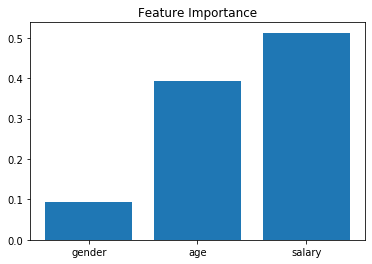

In [53]:
% pylab inline
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(0, len(names)), importance)
plt.xticks(range(0,len(names)), names)
plt.show()


## 小任務
- 請使用 rfe 找出 iris 資料中，哪兩個欄位最重要?

In [54]:
from sklearn.datasets import load_iris
iris= load_iris()